## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from features_selection import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

This data set contains the following features:
- 'User ID': unique identification for consumer
- 'Age': cutomer age in years
- 'Estimated Salary': Annual Income of consumer (USD)
- 'Gender': Whether consumer was male or female
- 'Purchased': 0 or 1 indicated clicking on Ad

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
data.rename(columns={'Gender': 'gender','Age':'age', 'EstimatedSalary': 'estimated_salary','Purchased':'purchased'}, inplace=True)

In [7]:
data.head()

,User ID,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## EDA

### checking for duplicated data

In [8]:
data['User ID'].is_unique

True

### dropping irrelevant features

In [9]:
data.drop('User ID',axis = 1,inplace = True)

### data analysis

In [10]:
data.describe()

,age,estimated_salary,purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            400 non-null    object
 1   age               400 non-null    int64 
 2   estimated_salary  400 non-null    int64 
 3   purchased         400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
data.isnull().sum()

gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

In [13]:
data['purchased'].value_counts()

purchased
0    257
1    143
Name: count, dtype: int64

In [14]:
data[['age','estimated_salary','purchased']].groupby('purchased').mean()

,age,estimated_salary
purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


### checking features distribution

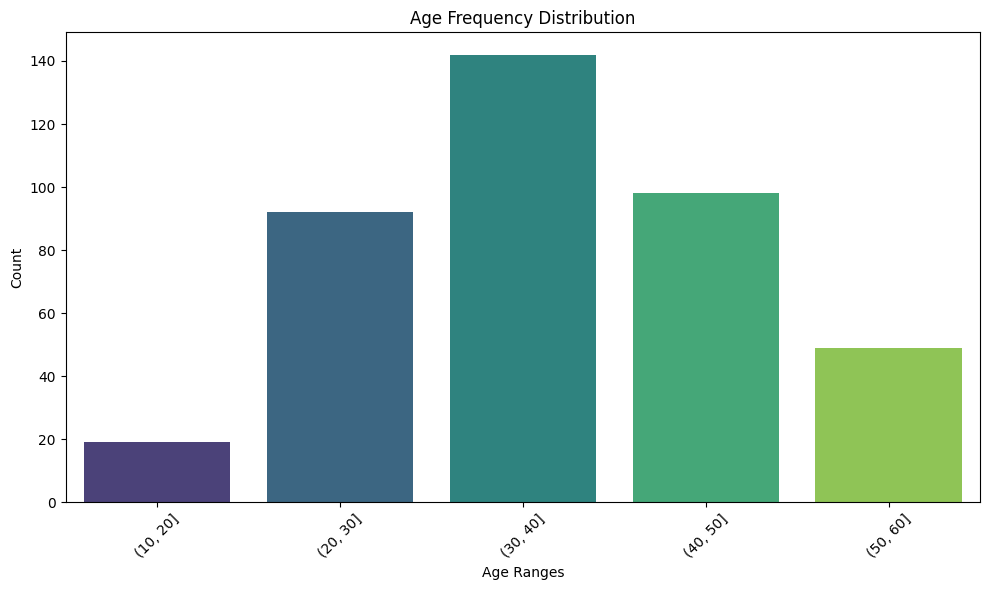

In [15]:
bins = [10,20,30,40,50,60]
age_ranges = pd.cut(data['age'], bins=bins)
plt.figure(figsize=(10, 6))
sns.countplot(x=age_ranges, palette='viridis')
plt.title('Age Frequency Distribution')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() # avoid labels overlapping 
plt.show()

In [16]:
sns.set()

<Axes: xlabel='gender', ylabel='count'>

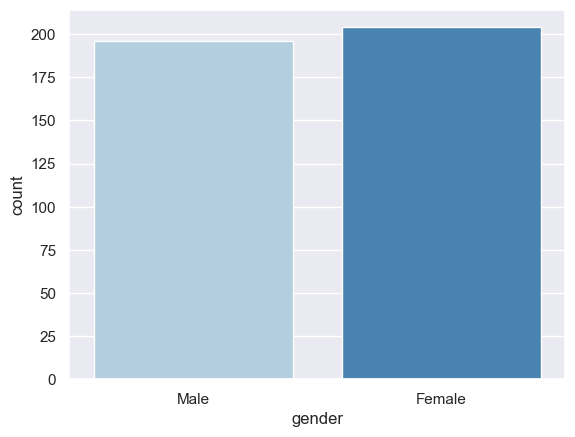

In [17]:
sns.countplot(x='gender', data=data, palette='Blues')

<Axes: xlabel='purchased', ylabel='count'>

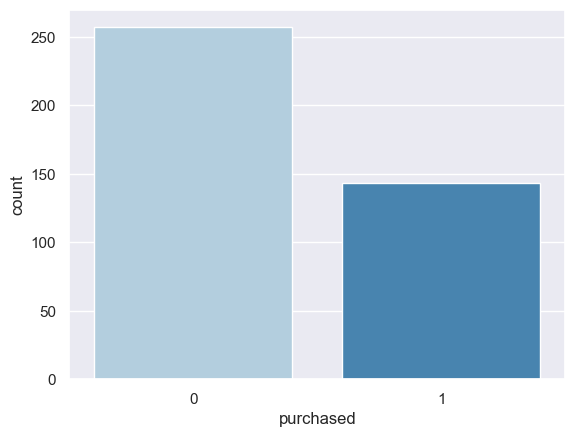

In [18]:
sns.countplot(x='purchased',data=data,palette = 'Blues')

Text(0.5, 1.0, 'estimated_salary Distribution')

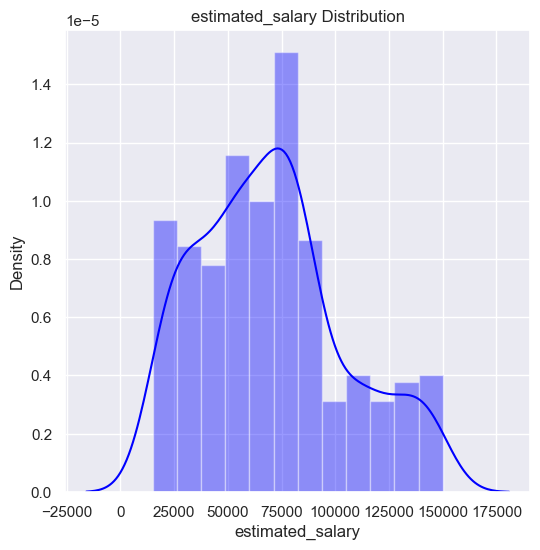

In [19]:
plt.figure(figsize = (6,6))
sns.distplot(data['estimated_salary'],color = 'blue')
plt.title("estimated_salary Distribution")

### boxplots for checking group based spread of estimated salary

<Axes: xlabel='estimated_salary', ylabel='gender'>

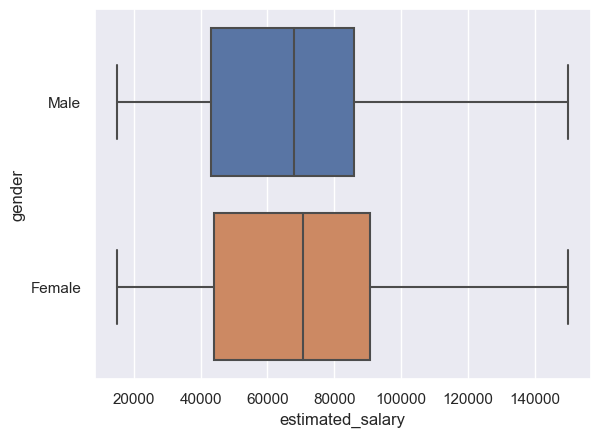

In [20]:
sns.boxplot(x='estimated_salary',y='gender',data=data)

<Axes: xlabel='estimated_salary', ylabel='age'>

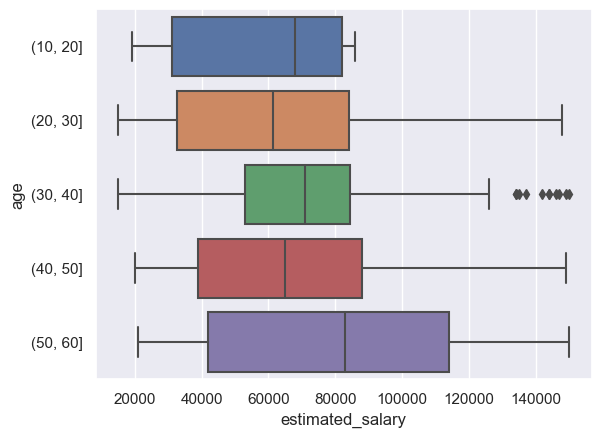

In [21]:
bins = [10,20,30,40,50,60]
age_ranges = pd.cut(data['age'], bins=bins)
sns.boxplot(x='estimated_salary',y=age_ranges,data=data)

### which age group made the most purchases?

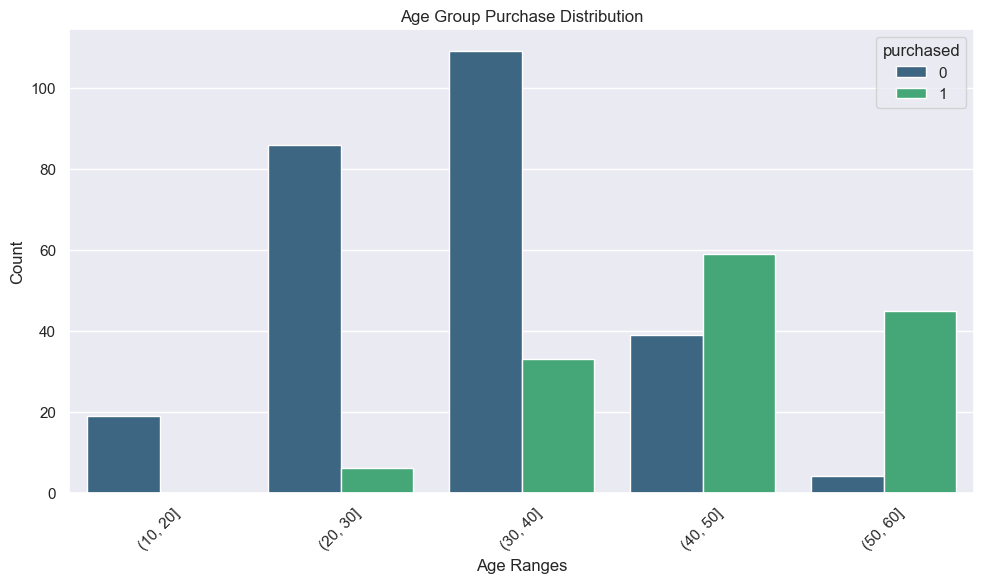

In [22]:
bins = [10,20,30,40,50,60]
age_ranges = pd.cut(data['age'], bins=bins)
plt.figure(figsize=(10, 6))
sns.countplot(x=age_ranges,hue=data['purchased'], palette='viridis')
plt.title('Age Group Purchase Distribution')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() # avoid labels overlapping 
plt.show()

### purchasing power of individuals who purchased the product

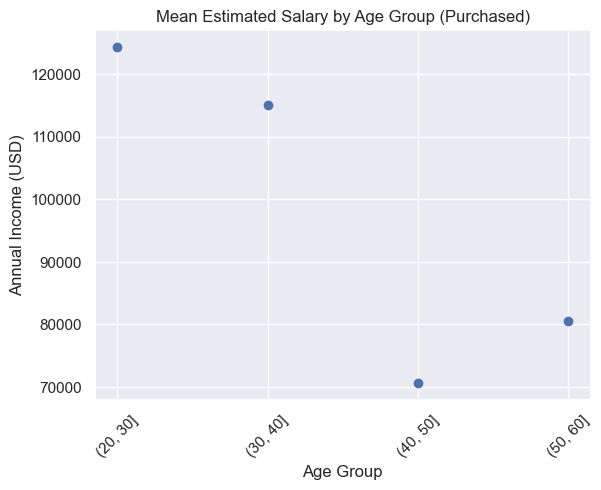

In [23]:
purchased = data[data['purchased'] == 1]
bins = [10,20,30,40,50,60]
age_ranges = pd.cut(purchased['age'], bins=bins)
purchased['age_group'] = age_ranges
purchased.reset_index(drop =True,inplace =True)
mean_salary_by_age = purchased.groupby('age_group')['estimated_salary'].mean()
mean_salary_by_age.index = mean_salary_by_age.index.astype(str)
plt.scatter(mean_salary_by_age.index, mean_salary_by_age.values, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (USD)')
plt.title('Mean Estimated Salary by Age Group (Purchased)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### purchasing power of individuals who didn't purchased the product

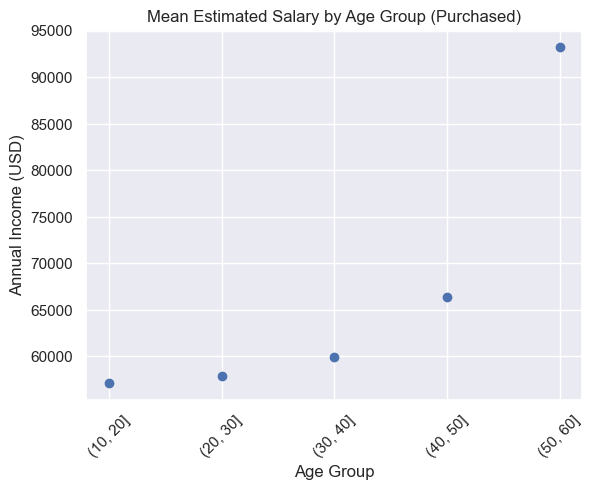

In [24]:
purchased = data[data['purchased'] == 0]
bins = [10,20,30,40,50,60]
age_ranges = pd.cut(purchased['age'], bins=bins)
purchased['age_group'] = age_ranges
purchased.reset_index(drop =True,inplace =True)
mean_salary_by_age = purchased.groupby('age_group')['estimated_salary'].mean()
mean_salary_by_age.index = mean_salary_by_age.index.astype(str)
plt.scatter(mean_salary_by_age.index, mean_salary_by_age.values, marker='o')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (USD)')
plt.title('Mean Estimated Salary by Age Group (Purchased)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Data Preprocessing

### outlier removal 

There is no unusual outlier existing in the data as per EDA.

### feature encoding

In [25]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])

In [26]:
data.head()

,gender,age,estimated_salary,purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


- 1 ==> Male
- 0 ==> Female

In [27]:
X = data.drop('purchased',axis = 1)
y = data.purchased

In [28]:
X.shape

(400, 3)

In [29]:
y.shape

(400,)

### features selection

In [30]:
fs = Features_Selection(X,y)

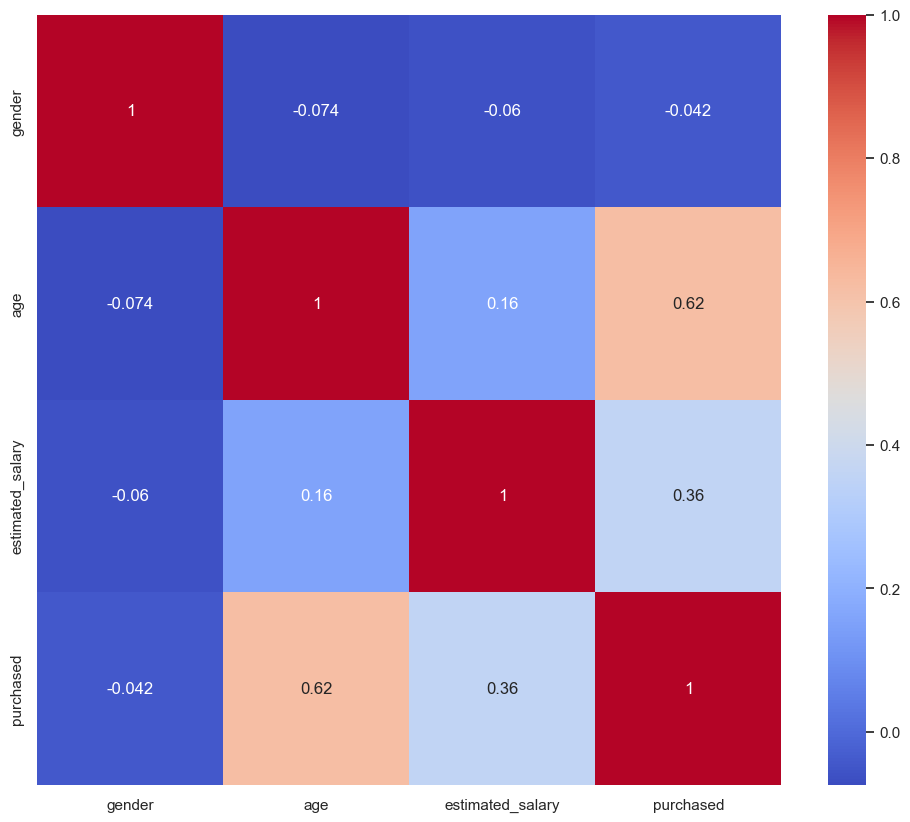

In [31]:
fs.corr_matrix_visual()

In [32]:
fs.const_features_selection(0.001)

Total Variable Features = 3
Total Constant Features = 0

All features have variance of more than 0.001.


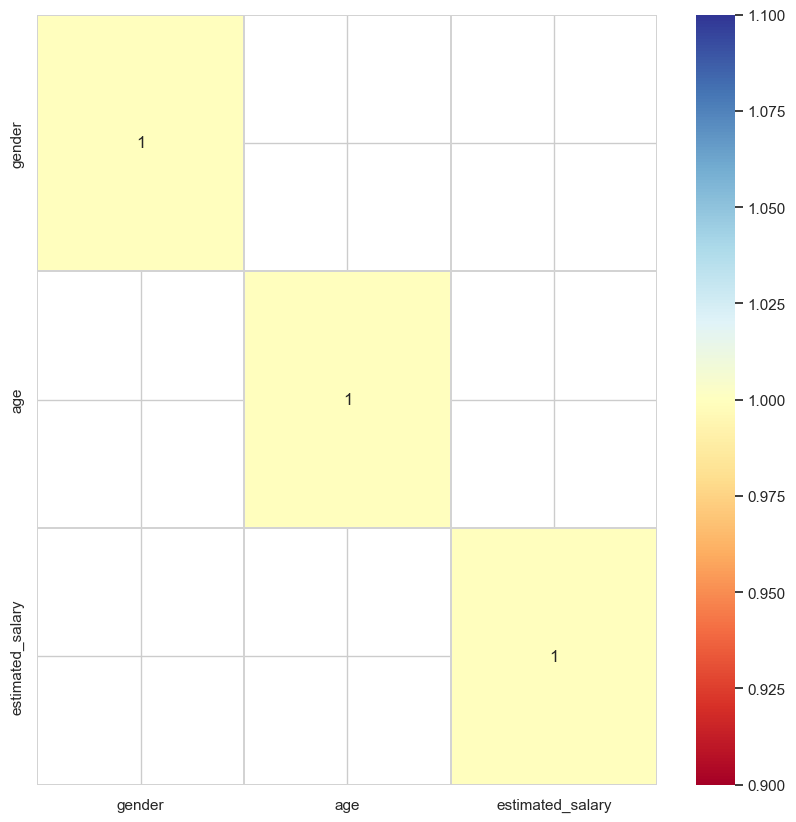

In [33]:
fs.features_corr_visual_filter(0.95)

In [34]:
fs.features_corr_filter(0.95)

All features have correlation of less than 0.95 with each other.


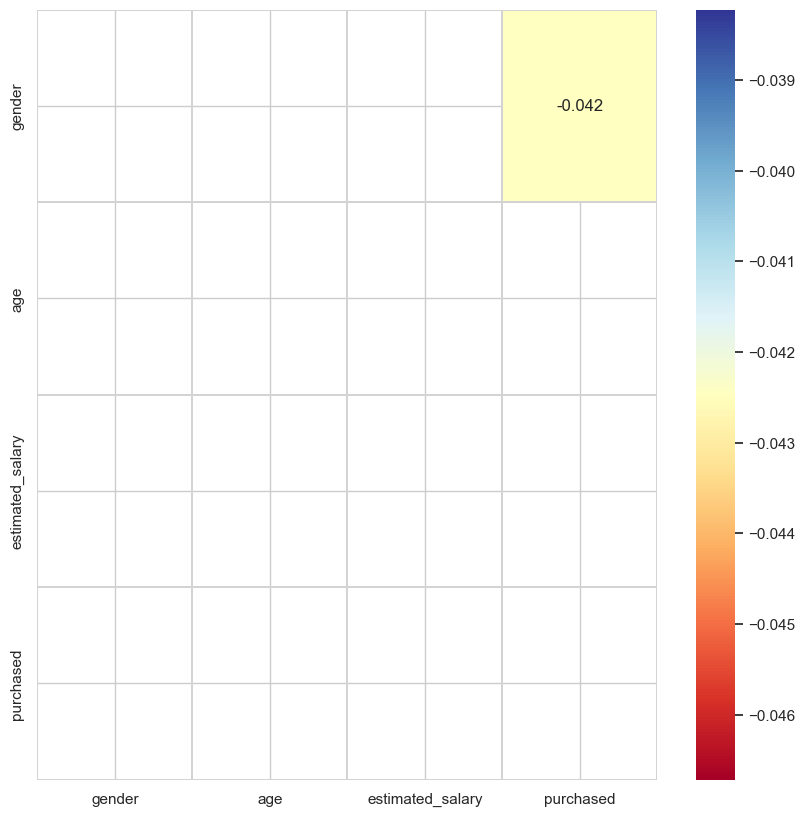

In [35]:
fs.features_corr_with_output_visual_filter(0.05)

In [36]:
fs.features_corr_with_output_filter(0.05)

{'gender'}
Do you want to drop the features with correlation with output below threshold 0.05 ? (y/n) y
Features Dropped!


### normalization

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(X)

MinMaxScaler()

In [39]:
scaled_data = scaler.transform(X)

In [40]:
scaled_data[0]

array([0.02380952, 0.02962963])

### exporting scaler model

In [41]:
with open('min_max_scaler_model.p', 'wb') as f:
    pickle.dump(scaler, f)

## Train_Test_Splits

In [42]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y, test_size = 0.2, stratify = y)

In [43]:
x_train.shape

(320, 2)

In [44]:
y_train.shape

(320,)

In [45]:
x_test.shape

(80, 2)

In [46]:
y_test.shape

(80,)

## Models Training with GridSearchCV

In [47]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

def gridsearchcv(X, y):
    algos = {
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {
               'priors' : [None]
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [48]:
stats = gridsearchcv(x_train,y_train)

In [49]:
stats.to_csv('stats.csv')

In [50]:
stats

,model,best_score,best_params
0,naive_bayes,0.896875,{'priors': None}
1,logistic_regression,0.871875,"{'penalty': 'l1', 'solver': 'saga'}"


## Models Evaluation

### Naive Bayes Model Evaluation

In [51]:
with open('naive_bayes_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [52]:
model1.score(x_train,y_train)

0.9125

In [53]:
model1.score(x_test,y_test)

0.8375

#### confusion matrix

Text(54.75, 0.5, 'Truth')

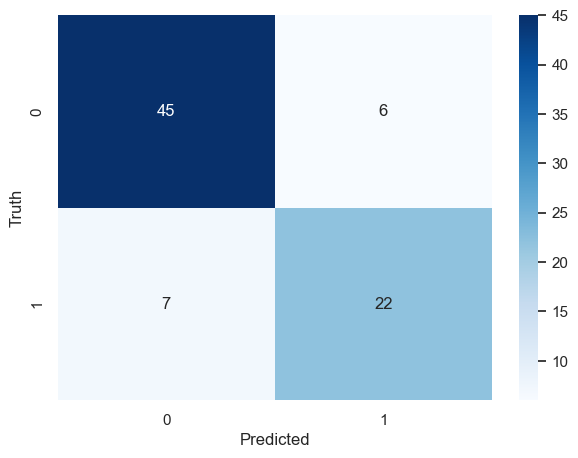

In [54]:
cm = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### classification report

In [55]:
print(classification_report(y_test, model1.predict(x_test), target_names=X.columns))

                  precision    recall  f1-score   support

             age       0.87      0.88      0.87        51
estimated_salary       0.79      0.76      0.77        29

        accuracy                           0.84        80
       macro avg       0.83      0.82      0.82        80
    weighted avg       0.84      0.84      0.84        80



### Logistic Regression Model Evaluation

In [56]:
with open('logistic_regression_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [57]:
model2.score(x_train,y_train)

0.871875

In [58]:
model2.score(x_test,y_test)

0.7875

#### confusion matrix

Text(54.75, 0.5, 'Truth')

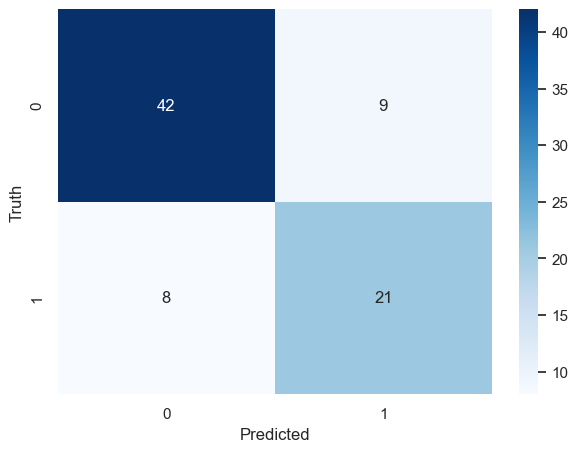

In [59]:
cm = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### classification report

In [60]:
print(classification_report(y_test, model1.predict(x_test), target_names=X.columns))

                  precision    recall  f1-score   support

             age       0.87      0.88      0.87        51
estimated_salary       0.79      0.76      0.77        29

        accuracy                           0.84        80
       macro avg       0.83      0.82      0.82        80
    weighted avg       0.84      0.84      0.84        80

